In [16]:
# basic analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pickle
import joblib
from pathlib import Path
np.random.seed(7)

In [2]:
# Load data
df = pd.read_csv('/Users/billqiu/bootcamp_Zhiang_Qiu/project/data/raw/api_source-alpha_symbol-MSFT_20250820-142556.csv')

In [3]:
# Create features
df['ret'] = df['adj_close'].pct_change().fillna(0.0)
df['ma_20'] = df['adj_close'].rolling(20).mean()
df['volatility'] = df['ret'].rolling(21).std()

In [4]:
# Make a prediction column which shows whether the next day's return is positive
df.loc[:,"pred"] = (df["ret"].shift(-1) > 0).astype(int)
df = df.dropna()

In [6]:
# Import the random forest code
import sys
sys.path.append("/Users/billqiu/bootcamp_Zhiang_Qiu/project/src")

from utils import train_random_forest
model, X_test, y_test, y_pred = train_random_forest(df, feature_cols=['ma_20', 'volatility'], target_col='pred', n_estimators=200)

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         6
           1       0.73      0.57      0.64        14

    accuracy                           0.55        20
   macro avg       0.53      0.54      0.52        20
weighted avg       0.61      0.55      0.57        20



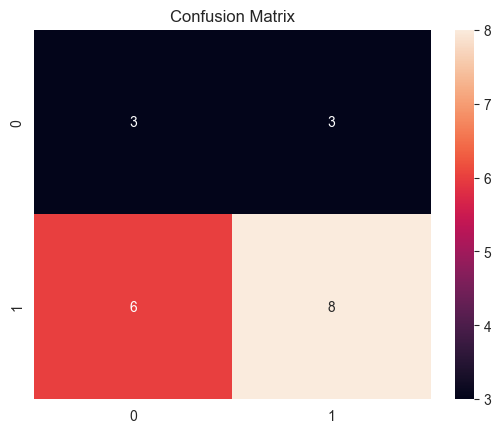

In [8]:
# Visualization
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d'); plt.title('Confusion Matrix'); plt.show()

In [9]:
print("Basic analysis complete.")

Basic analysis complete.


In [10]:
print("Notebook cleaned and ready for handoff.")

Notebook cleaned and ready for handoff.


In [17]:
out_path = Path("/Users/billqiu/bootcamp_Zhiang_Qiu/homework/stage13_productization/model/model.pkl")
out_path.parent.mkdir(parents=True, exist_ok=True)
joblib.dump(model, out_path)

['/Users/billqiu/bootcamp_Zhiang_Qiu/homework/stage13_productization/model/model.pkl']

In [19]:
with open(out_path, 'wb') as f:
    pickle.dump(model, f)

with open(out_path, 'rb') as f:
    loaded_model = pickle.load(f)

In [21]:
# Example prediction
model.predict(X_test)

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0])

In [24]:
from flask import Flask, request, jsonify
import threading
import matplotlib.pyplot as plt
import io
import base64

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    # TODO: Replace placeholder logic with actual model prediction
    data = request.get_json()
    features = data.get('features', None)
    if features is None:
        return jsonify({'error': 'No features provided'}), 400
    pred = sum(features)  # placeholder
    return jsonify({'prediction': pred})

@app.route('/predict/<float:input1>', methods=['GET'])
def predict_one(input1):
    pred = input1 * 2  # placeholder
    return jsonify({'prediction': pred})

@app.route('/predict/<float:input1>/<float:input2>', methods=['GET'])
def predict_two(input1, input2):
    pred = input1 + input2  # placeholder
    return jsonify({'prediction': pred})

@app.route('/plot')
def plot():
    # TODO: Replace with meaningful chart or image
    fig, ax = plt.subplots()
    ax.plot([0, 1, 2], [0, 1, 4])
    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    img_bytes = base64.b64encode(buf.read()).decode('utf-8')
    return f'<img src="data:image/png;base64,{img_bytes}"/>'

def run_flask():
    app.run(port=5000)

# Launch Flask in a separate thread
threading.Thread(target=run_flask).start()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [27/Aug/2025 15:01:07] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [27/Aug/2025 15:01:07] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [27/Aug/2025 15:01:20] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [27/Aug/2025 15:01:20] "GET /predict/2.0 HTTP/1.1" 200 -
127.0.0.1 - - [27/Aug/2025 15:01:20] "GET /predict/1.0/3.0 HTTP/1.1" 200 -
127.0.0.1 - - [27/Aug/2025 15:01:20] "GET /plot HTTP/1.1" 200 -


{'prediction': 0.7000000000000001}
{'prediction': 4.0}
{'prediction': 4.0}



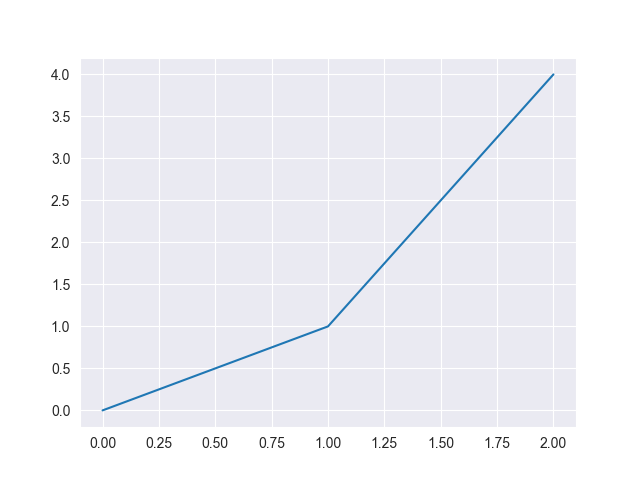

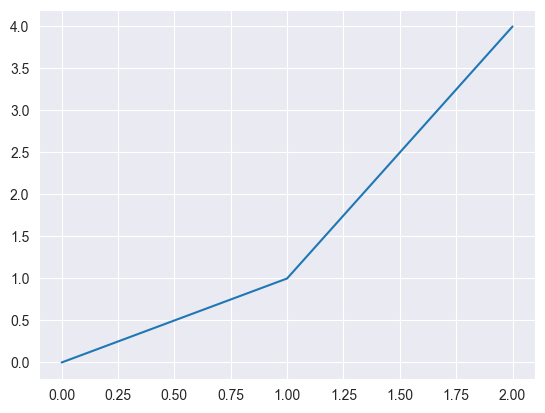

In [27]:
import requests
from IPython.display import display, HTML

# POST /predict
response = requests.post(
    'http://127.0.0.1:5000/predict',
    json={'features':[0.1, 0.2, 0.4]}
)
print(response.json())

# GET /predict/<input1>
response2 = requests.get('http://127.0.0.1:5000/predict/2.0')
print(response2.json())

# GET /predict/<input1>/<input2>
response3 = requests.get('http://127.0.0.1:5000/predict/1.0/3.0')
print(response3.json())

# GET /plot
response_plot = requests.get('http://127.0.0.1:5000/plot')
display(HTML(response_plot.text))